# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [6]:
# run this cell to upload file using GUI if you are using google colab

from google.colab import files
files.upload()

Saving prices.csv to prices.csv


In [4]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
import pandas as pd
df=pd.read_csv("/content/prices.csv")

In [11]:
df.sample(10)

,date,symbol,open,close,low,high,volume
255194,2012-02-29,ANTM,65.570000,65.629997,65.089996,65.879997,3079600.0
637728,2015-04-22,JCI,42.400002,42.599998,42.119999,42.680000,1551300.0
264615,2012-03-28,BCR,98.839996,99.000000,98.400002,99.050003,435200.0
537986,2014-07-01,LNT,60.849998,60.070000,60.009998,60.889999,1450800.0
520825,2014-05-12,L,43.540001,43.310001,43.169998,43.580002,1180500.0
552082,2014-08-12,ETFC,21.450001,21.280001,21.180000,21.629999,1918900.0
572569,2014-10-10,BMY,49.770000,50.279999,49.770000,51.009998,8427700.0
520156,2014-05-09,CHD,67.660004,68.099998,67.589996,68.120003,1293400.0
815595,2016-09-20,NRG,11.270000,11.430000,11.160000,11.530000,5937700.0
659126,2015-06-23,SNA,161.160004,160.509995,160.240005,161.740005,253900.0


## Question 2

### Drop null
- Drop null values if any

In [12]:
df.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [13]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [15]:
#No null values found in the dataset

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [16]:
df.drop(columns=["date","volume","symbol"],inplace=True)

In [17]:
df.sample(5)

,open,close,low,high
583672,56.759998,57.009998,56.619999,57.110001
574366,202.570007,210.520004,202.009995,211.279999
425818,23.180000,23.219999,23.000000,23.219999
764326,47.029999,46.810001,46.630001,47.189999
116147,28.209999,27.910000,27.870001,28.209999


## Question 3

### Print the dataframe
- print the modified dataframe

In [18]:
print(df.head())

         open       close         low        high
0  123.430000  125.839996  122.309998  126.250000
1  125.239998  119.980003  119.940002  125.540001
2  116.379997  114.949997  114.930000  119.739998
3  115.480003  116.620003  113.500000  117.440002
4  117.010002  114.970001  114.089996  117.330002


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [21]:
X=df.drop(columns=["close"])
Y=df["close"]

In [24]:
print(X.head())
print(Y.head())

         open         low        high
0  123.430000  122.309998  126.250000
1  125.239998  119.940002  125.540001
2  116.379997  114.930000  119.739998
3  115.480003  113.500000  117.440002
4  117.010002  114.089996  117.330002
0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64


## Question 4

### Create train and test sets
- Split the data into training and testing

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [65]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)


In [66]:
X_test

array([[-0.16888595, -0.16261727, -0.16907706],
       [-0.7014618 , -0.70141597, -0.69834077],
       [-0.7145853 , -0.71442811, -0.71453669],
       ...,
       [-0.64383767, -0.64623489, -0.64585181],
       [-0.39651919, -0.39478747, -0.39948468],
       [ 0.16194576,  0.17220421,  0.18806074]])

In [67]:
X_train

array([[ 0.05051519,  0.05497449,  0.05577433],
       [ 0.05278202,  0.05654083,  0.06014845],
       [-0.14049144, -0.13550866, -0.14271431],
       ...,
       [-0.25120616, -0.24683466, -0.23173279],
       [-0.2831798 , -0.27731682, -0.27535537],
       [ 0.04860637,  0.04352867,  0.04040599]])

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [68]:
import numpy as np
y_train=np.array(y_train)
y_test=np.array(y_test)

In [69]:
print(type(y_train))
print(type(y_test))
print(type(X_test))
print(type(X_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [70]:
X_train.shape

(638448, 3)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(3,),activation='linear'))
model.output_shape

(None, 1)

In [80]:
model1=Sequential([Input(shape=(3,)),Flatten(),Dense(1,activation='linear')])
model1.output_shape

(None, 1)

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [84]:
model.compile(optimizer='sgd',loss='mean_squared_error')

In [85]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [90]:
model.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/50
4988/4988 [==============================] - 5s 1ms/step - loss: 39.7603 - val_loss: 0.9599
Epoch 2/50
4988/4988 [==============================] - 5s 1000us/step - loss: 0.9645 - val_loss: 0.9510
Epoch 3/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9579 - val_loss: 0.9683
Epoch 4/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9508 - val_loss: 0.9495
Epoch 5/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9447 - val_loss: 0.9331
Epoch 6/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9364 - val_loss: 0.9336
Epoch 7/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9300 - val_loss: 0.9167
Epoch 8/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9229 - val_loss: 0.9095
Epoch 9/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9150 - val_loss: 0.9038
Epoch 10/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [93]:
model.evaluate(X_test,y_test)

6651/6651 [==============================] - 5s 688us/step - loss: 0.7088


0.7087876200675964

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [98]:
manual_data=scale.transform([[123.430000, 122.30999, 116.250000]])
model.predict(manual_data)

array([[119.635284]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [102]:
(trainX,trainY),(testX,testY)=tf.keras.datasets.fashion_mnist.load_data()

In [104]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Change train and test labels into one-hot vectors

In [105]:
trainY=tf.keras.utils.to_categorical(trainY,num_classes=10)
testY=tf.keras.utils.to_categorical(testY,num_classes=10)

### Build the Graph

### Initialize model, reshape & normalize data

In [110]:
fashion_model=tf.keras.models.Sequential()
fashion_model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))
fashion_model.add(tf.keras.layers.BatchNormalization())

In [111]:
fashion_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
Total params: 3,136
Trainable params: 1,568
Non-trainable params: 1,568
_________________________________________________________________


### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [112]:
fashion_model.add(tf.keras.layers.Dense(200,activation='relu'))
fashion_model.add(tf.keras.layers.Dense(100,activation='relu'))

fashion_model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [113]:
fashion_model.add(tf.keras.layers.Dense(10,activation='softmax'))
fashion_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [114]:
fashion_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_14 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
___________________________________________

In [116]:
fashion_model.fit(trainX,trainY,epochs=10,batch_size=32,validation_data=(testX,testY))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5089 - accuracy: 0.8185 - val_loss: 0.4138 - val_accuracy: 0.8527
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3924 - accuracy: 0.8557 - val_loss: 0.3906 - val_accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3586 - accuracy: 0.8685 - val_loss: 0.3735 - val_accuracy: 0.8708
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3322 - accuracy: 0.8776 - val_loss: 0.3495 - val_accuracy: 0.8739
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3164 - accuracy: 0.8842 - val_loss: 0.3683 - val_accuracy: 0.8776
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3017 - accuracy: 0.8872 - val_loss: 0.3459 - val_accuracy: 0.8804
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2878 - accuracy: 0.8916 - val_loss: 0.3523 - val_accuracy

In [117]:
test_loss,test_accuracy=fashion_model.evaluate(testX,testY)

313/313 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8844


In [118]:
pred=fashion_model.predict(testX)

In [119]:
pred[0]

array([1.1434783e-14, 3.6060232e-18, 2.8461254e-15, 3.6767063e-13,
       1.6717536e-15, 3.1573734e-05, 7.3699666e-14, 2.2670876e-03,
       2.0664368e-14, 9.9770135e-01], dtype=float32)

In [120]:
np.argmax(pred[0])

9

In [121]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

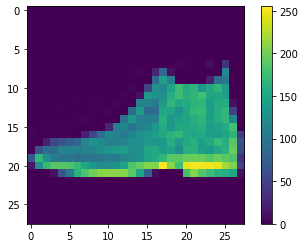

In [122]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(testX[0])
plt.colorbar()
plt.grid(False)
plt.show()